In [1]:
# Importng important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('/Users/juhimishra/Downloads/flight scrapping  - Train excel sheet.xlsx')
df.head()

,Filght,Date,Arrival,Departure,Duration,Total Stop,Source,Destination,Price,Site
0,Indigo Air,2021-12-08,07:00,11:20,04h 20m,1 Stop,Kolkata,Hyderabad,5338,viman
1,Indigo Air,2021-12-08,07:00,17:00,10h 00m,1 Stop,Kolkata,Hyderabad,5467,viman
2,Indigo Air,2021-12-08,14:50,22:45,07h 55m,1 Stop,Kolkata,Hyderabad,5646,viman
3,Indigo Air,2021-12-08,11:05,17:20,06h 15m,1 Stop,Kolkata,Hyderabad,5817,viman
4,Air Asia,2021-12-08,04:40,06:45,02h 05m,Non Stop,Kolkata,Hyderabad,6096,viman


In [4]:
print('Total no of rows: ',df.shape[0])
print('Total no of columns: ',df.shape[1])

Total no of rows:  1635
Total no of columns:  10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1635 entries, 0 to 1634
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Filght       1635 non-null   object        
 1   Date         1635 non-null   datetime64[ns]
 2   Arrival      1635 non-null   object        
 3   Departure    1635 non-null   object        
 4   Duration     1635 non-null   object        
 5   Total Stop   1635 non-null   object        
 6   Source       1635 non-null   object        
 7   Destination  1635 non-null   object        
 8   Price        1635 non-null   int64         
 9   Site         1635 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 127.9+ KB


Except date column which is in date format and price column which is our target column and in integer form rest all are in object datatype, which we need to convert to numerical datatype so that our machine algorithm can understand 

### Date & Time conversion

In [6]:
df['Date']=pd.to_datetime(df['Date'])

In [7]:
date = df['year']=df['Date'].dt.year
Month = df['Month']=df['Date'].dt.month
Day = df['Day']=df['Date'].dt.day
df.head(2)

,Filght,Date,Arrival,Departure,Duration,Total Stop,Source,Destination,Price,Site,year,Month,Day
0,Indigo Air,2021-12-08,07:00,11:20,04h 20m,1 Stop,Kolkata,Hyderabad,5338,viman,2021,12,8
1,Indigo Air,2021-12-08,07:00,17:00,10h 00m,1 Stop,Kolkata,Hyderabad,5467,viman,2021,12,8


In [8]:
df['Dep_hr']=pd.to_datetime(df['Departure']).dt.hour
df['Dep_mins']=pd.to_datetime(df['Departure']).dt.minute

In [9]:
df['Arrival_Hr']=pd.to_datetime(df['Arrival']).dt.hour
df['Arrival_mins']=pd.to_datetime(df['Arrival']).dt.minute

In [10]:
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if 'h' in duration[i]:
            duration[i]=duration[i].strip()+' 0m'
        else:
            duration[i]='0h '+duration[i]

duration_hour=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep='h')[0]))
    duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1]))


In [11]:
df['Duration_Hr']=duration_hour
df['Duration_min']=duration_mins

### Data Cleaning

In [12]:
#Dropping Date column as already extracted data from there to three different columns
df.drop(columns=['Date','Arrival','Departure','Duration','Site'],inplace=True)

In [13]:
# Let's check any missing data 
df.isna().sum().to_frame(name = 'Missing Values')

,Missing Values
Filght,0
Total Stop,0
Source,0
Destination,0
Price,0
year,0
Month,0
Day,0
Dep_hr,0
Dep_mins,0


There is no missing values in any of the columns

### EDA

In [14]:
df['Filght'].value_counts()

Vistara           511
Air India         382
Indigo Air        247
Go Air            107
Air Asia          103
Indigo             77
GO FIRST           58
 Vistara           42
AirAsia            27
Spice Jet          22
 Air India         21
 IndiGo            14
 Go First          11
SpiceJet            6
 AirAsia India      5
 SpiceJet           2
Name: Filght, dtype: int64

In [15]:
df['Filght']=df['Filght'].replace({' Vistara':'Vistara',' Air India':'Air India','Indigo Air':'Indigo','AirAsia India':'Air Asia',
                                  'GO FIRST':'Go First','Spice Jet':'SpiceJet',' IndiGo':'Indigo',' Go First':'Go First',
                                  ' AirAsia India':'Air Asia',' SpiceJet':'SpiceJet','Air Asia':'AirAsia'})

df['Filght'].value_counts()

Vistara      553
Air India    403
Indigo       338
AirAsia      130
Go Air       107
Go First      69
SpiceJet      30
Air Asia       5
Name: Filght, dtype: int64

In [16]:
df['Source'].value_counts()

Kolkata      521
Bangalore    384
Mumbai       357
New Delhi    166
BANGALORE    109
CHENNAI       90
CHENNAI        8
Name: Source, dtype: int64

In [17]:
df['Source']=df['Source'].replace({'BANGALORE':'Bangalore','CHENNAI':'chennai'})

df['Source'].value_counts()

Kolkata      521
Bangalore    493
Mumbai       357
New Delhi    166
CHENNAI       90
chennai        8
Name: Source, dtype: int64

In [18]:
df['Destination'].value_counts()

Mumbai       384
Bangalore    357
Hyderabad    348
New Delhi    173
Kolkata      166
CHENNAI      109
BANGALORE     98
Name: Destination, dtype: int64

In [19]:
df['Destination']=df['Destination'].replace({'BANGALORE':'Bangalore',})

df['Destination'].value_counts()

Bangalore    455
Mumbai       384
Hyderabad    348
New Delhi    173
Kolkata      166
CHENNAI      109
Name: Destination, dtype: int64

In [20]:
df['Total Stop'].value_counts()

1 Stop        764
1-stop        303
2 Stop        154
Non Stop      136
1 - Change    127
2 - Change     59
non-stop       52
Non- Stop      21
2+-stop        19
Name: Total Stop, dtype: int64

In [23]:
df['Total Stop']= df['Total Stop'].replace({'1-stop':'1 Stop','1 - Change':'1 Stop','2 - Change':'2 Stop',
                                            'non-stop':'Non- Stop','Non- Stop':'Non Stop'})

In [24]:
df['Total Stop'].value_counts()

1 Stop      1194
2 Stop       213
Non Stop     209
2+-stop       19
Name: Total Stop, dtype: int64

### Visual Analysis

<AxesSubplot:xlabel='Filght', ylabel='count'>

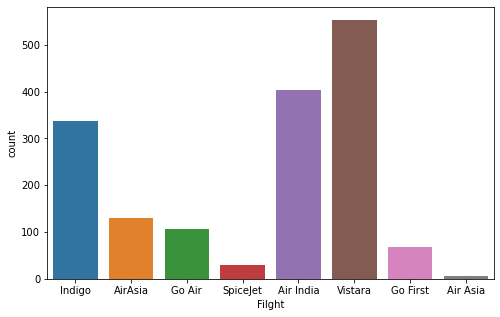

In [25]:
plt.figure(figsize=(8,5))
sns.countplot('Filght',data=df)

Above using countplot analysed which flight are more in number. Vistara followed by Air India which is ruined by government is more in number compare to all other flights and Air Asia is the which is having very less flights available . In economical flights we can see that indigo is more in number. Even Air Asia too are considered as economical flight only as the price these flights are cheaper depending upon time and distance. 

<Figure size 216x144 with 0 Axes>

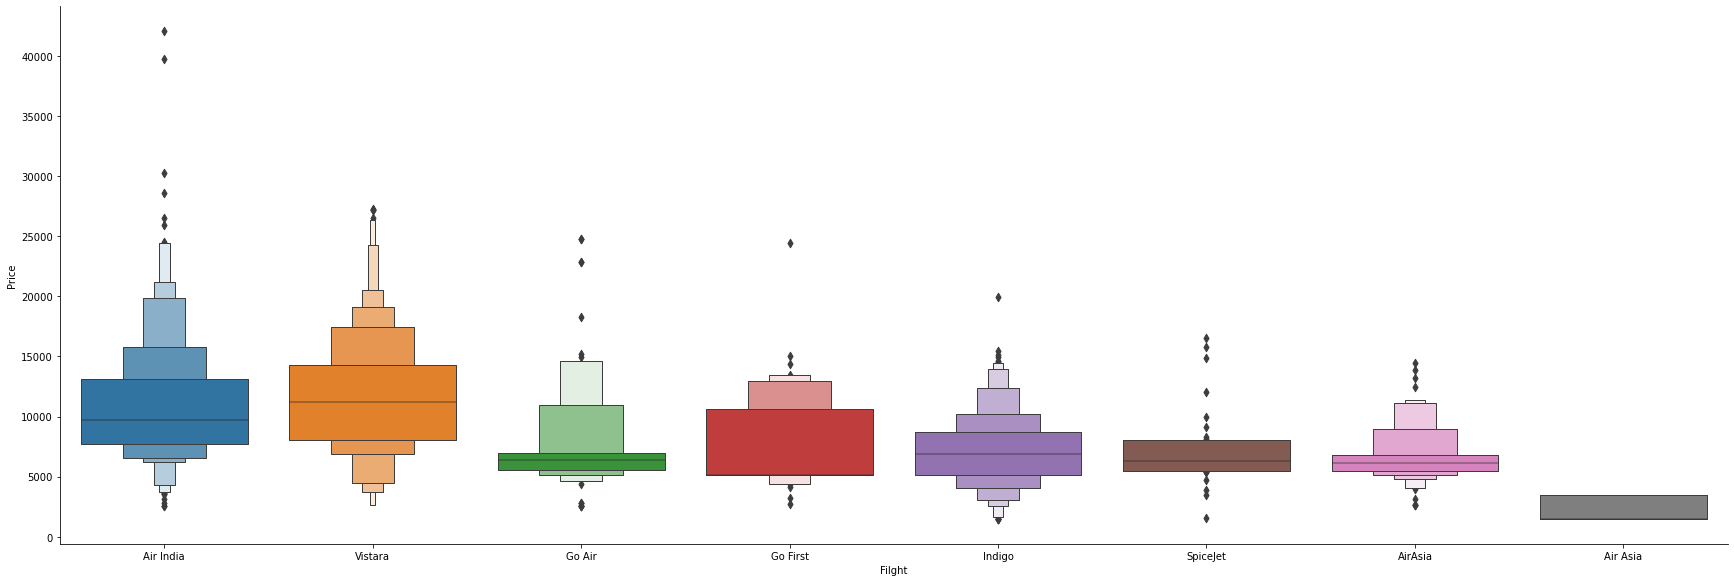

In [26]:
plt.figure(figsize=(3,2))
sns.catplot(x='Filght',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen',height = 8, aspect = 3)
plt.show()

Here using catplot trying to get the insight of which is cheaper and which flight do have higher price. Vistara do have higher price compare to all other flights while Air India too shows higher rate only . By plot we can see that there are minor difference between vistara and Air India. Here we can say that these two flights generally targets business class customers. While rest all are having economical price. They target all type of customers especially Indigo and Go Air do have cheaper price depending upon distance and time.  

<Figure size 288x216 with 0 Axes>

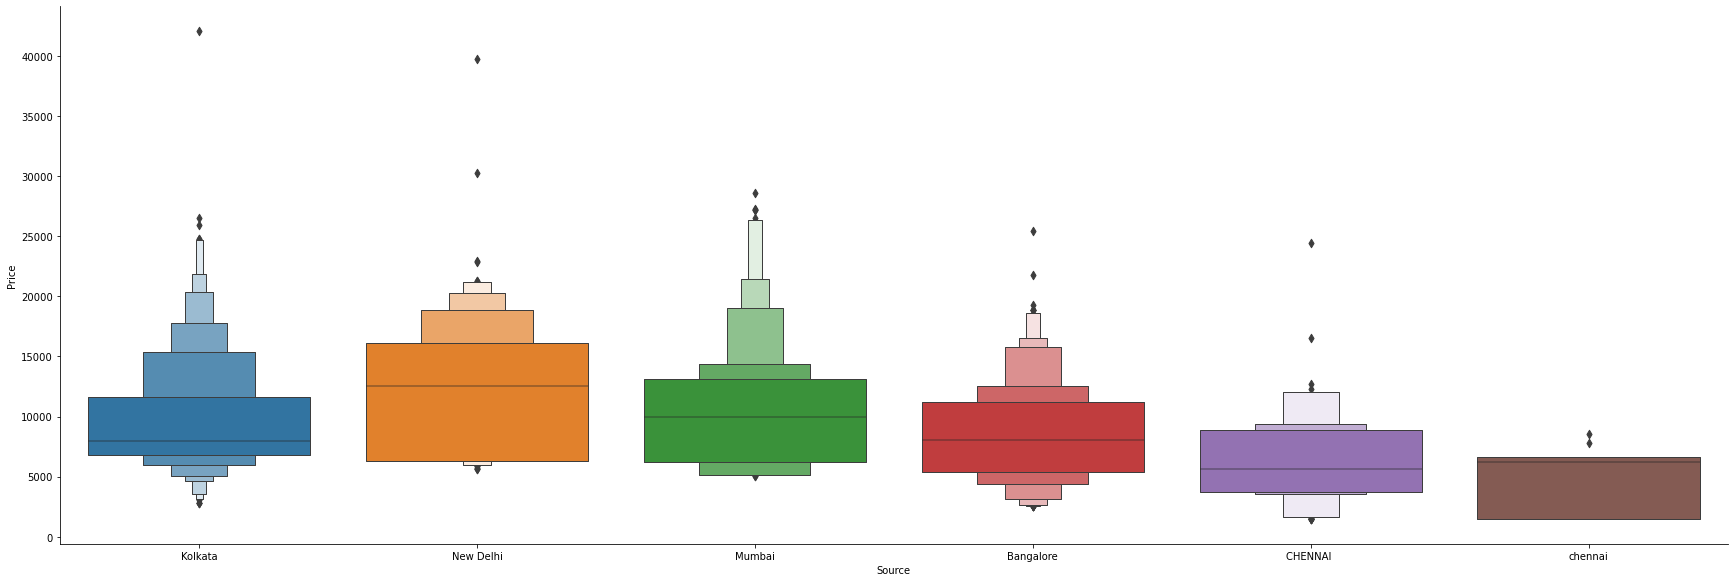

In [26]:
plt.figure(figsize=(4,3))
sns.catplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen',aspect=3,height=8)
plt.show()

Source means from where the customer takes flight. Here New Delhi we can see are having higher price compare to any other city . As I am analysing few of the metropolitan cities like Kolkata, New Delhi, Mumbai, Bangalore and Chennai. Among all New Delhi having higher price for any of the flight and lowest is for Chennai.


<Figure size 288x216 with 0 Axes>

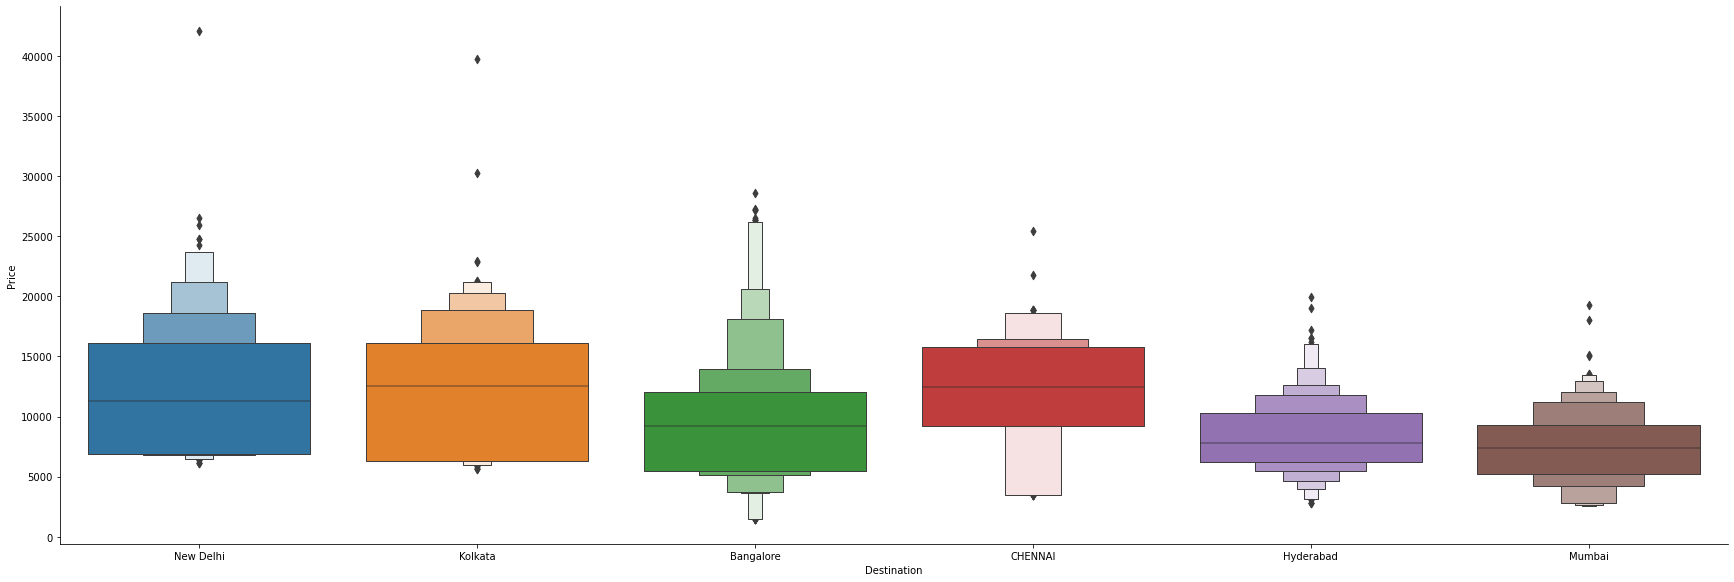

In [27]:
plt.figure(figsize=(4,3))
sns.catplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen',aspect=3,height=8)
plt.show()

Destination here means where customer wants to go means final destination. Again for New Delhi we can see having higher price likewise in source we observed. Even Kolkata too have higher flight rate compare to any other city.

<AxesSubplot:xlabel='Total Stop', ylabel='Price'>

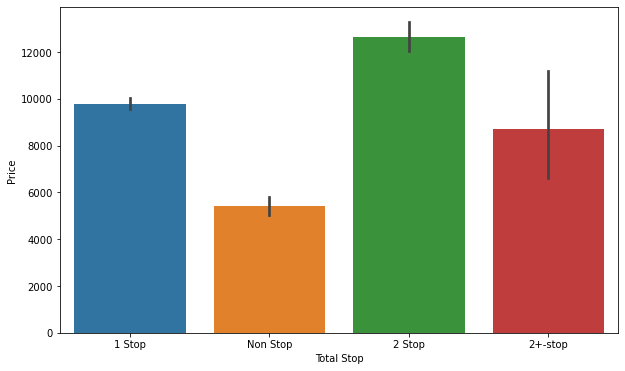

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(x='Total Stop',y= 'Price',data=df)

For more stoppage price of flight is high. Likewise above using barplot we can see that flight which is having 2 stop is having higher price followed by 2+ stop.. And the cheapest we can see is for non stop flights as these flights covers less distance . And for less distance it’s obvious that price will be less as distance coverage is less and fuel consumption even are too less. 


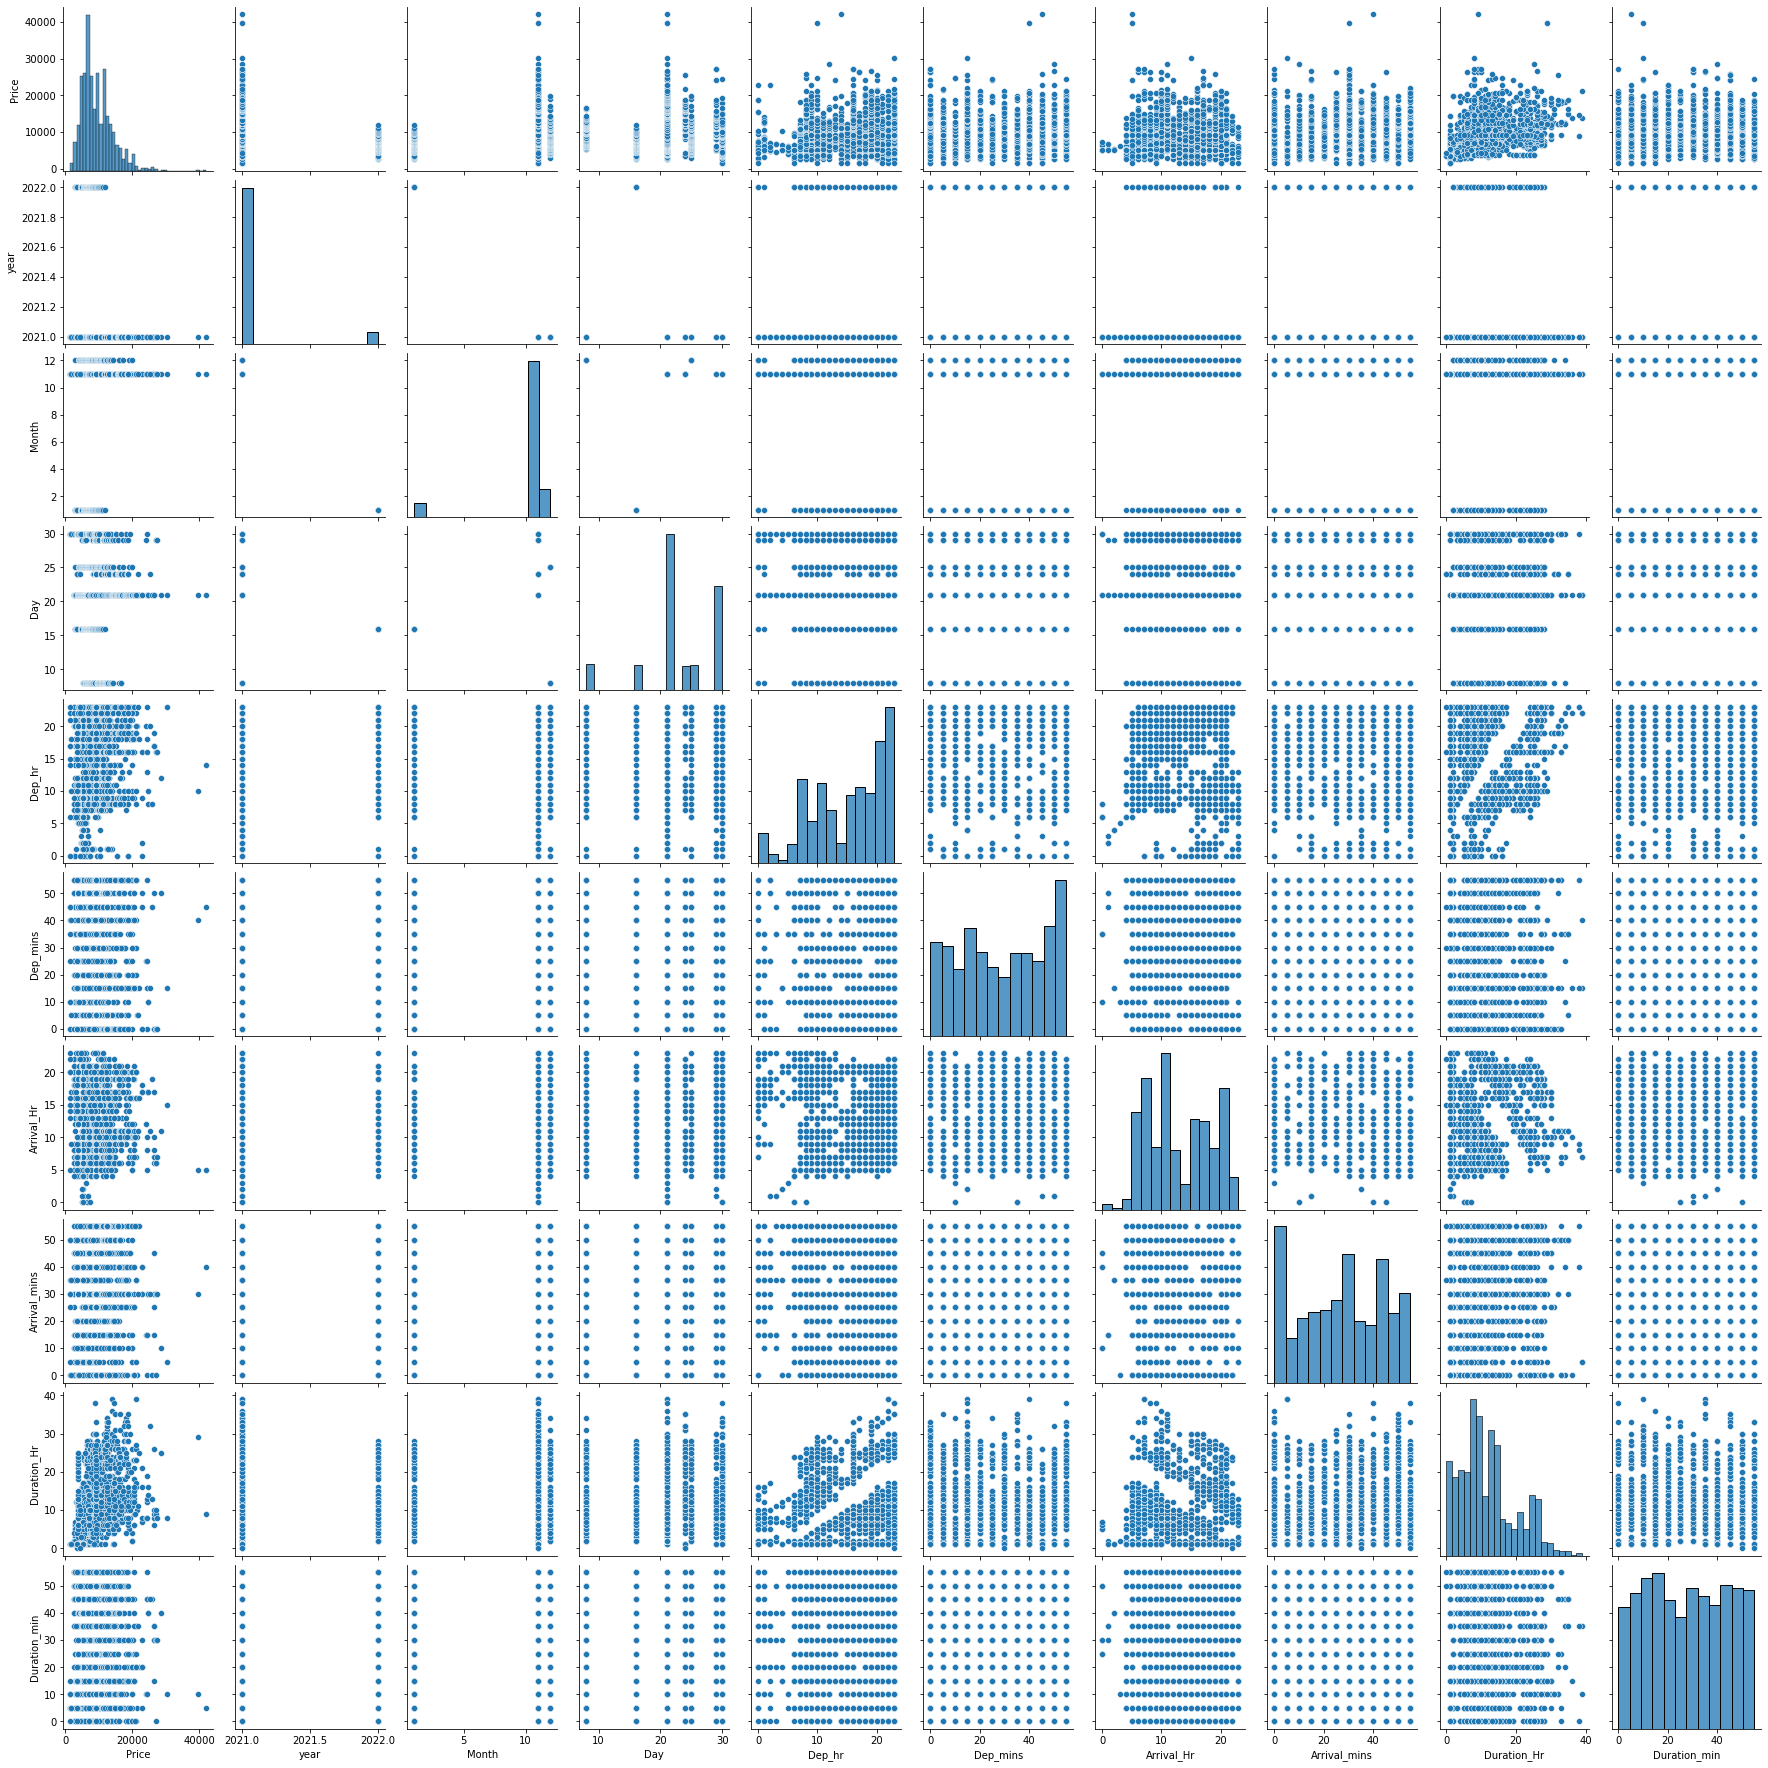

In [29]:
sns.pairplot(data=df)

With the help of pair plot we can see the relationship among features and target too.Here we get insight of date, arrival, departure and duration . Here date shows no relationship with price.Whereas departure hour and duration hour do have some relationship among them. Coming to arrival and departre none have direct relation with price. But price and duration relation we can see is showing towards upward which means tere are some relation between them.

### Feature Engineering

In [30]:
df.columns

Index(['Filght', 'Total Stop', 'Source', 'Destination', 'Price', 'year',
       'Month', 'Day', 'Dep_hr', 'Dep_mins', 'Arrival_Hr', 'Arrival_mins',
       'Duration_Hr', 'Duration_min'],
      dtype='object')

In [31]:
df['Total Stop'].unique()

array(['1 Stop', 'Non Stop', '2 Stop', '2+-stop'], dtype=object)

Replacing Total stop string object type to numerical form for model training as algorithm generally doesn't understand the string datatype

In [32]:
df['Total Stop'].replace({'1 Stop':0,'Non Stop':1,'2 Stop':2,'2+-stop':3},inplace=True)

Few columns which not converted using any other method due to number of variable were more , used onehot encoder to convert them to numerical form 

In [33]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,Total Stop,Price,year,Month,Day,Dep_hr,Dep_mins,Arrival_Hr,Arrival_mins,Duration_Hr,...,Source_CHENNAI,Source_Kolkata,Source_Mumbai,Source_New Delhi,Source_chennai,Destination_CHENNAI,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai,Destination_New Delhi
0,0,5338,2021,12,8,11,20,7,0,4,...,0,1,0,0,0,0,1,0,0,0
1,0,5467,2021,12,8,17,0,7,0,10,...,0,1,0,0,0,0,1,0,0,0
2,0,5646,2021,12,8,22,45,14,50,7,...,0,1,0,0,0,0,1,0,0,0
3,0,5817,2021,12,8,17,20,11,5,6,...,0,1,0,0,0,0,1,0,0,0
4,1,6096,2021,12,8,6,45,4,40,2,...,0,1,0,0,0,0,1,0,0,0


In [34]:
df.shape

(1635, 28)

In [35]:
for i in df.columns:
    print(i)

Total Stop
Price
year
Month
Day
Dep_hr
Dep_mins
Arrival_Hr
Arrival_mins
Duration_Hr
Duration_min
Filght_Air India
Filght_AirAsia
Filght_Go Air
Filght_Go First
Filght_Indigo
Filght_SpiceJet
Filght_Vistara
Source_CHENNAI 
Source_Kolkata
Source_Mumbai
Source_New Delhi
Source_chennai
Destination_CHENNAI
Destination_Hyderabad
Destination_Kolkata
Destination_Mumbai
Destination_New Delhi


After conversion checked the name of columns as after aplying one hot encoder no of columns get increased 

In [36]:
train_df = df

Transfered all df data to train_df for better understanding between train and test data

### Test data 

Working on test data to have prediction on the same

In [37]:
test_df = pd.read_excel('/Users/juhimishra/Downloads/flight price - test data.xlsx')
test_df.head()

,Filght,Date,Arrival,Departure,Duration,Total Stop,Source,Destination
0,Indigo Air,2021-12-08,07:00,11:20,04h 20m,1 Stop,Kolkata,Hyderabad
1,Indigo Air,2021-12-08,07:00,17:00,10h 00m,1 Stop,Kolkata,Hyderabad
2,Indigo Air,2021-12-08,14:50,22:45,07h 55m,1 Stop,Kolkata,Hyderabad
3,Indigo Air,2021-12-08,11:05,17:20,06h 15m,1 Stop,Kolkata,Hyderabad
4,Air Asia,2021-12-08,04:40,06:45,02h 05m,Non Stop,Kolkata,Hyderabad


In [38]:
print('Total no of rows: ',test_df.shape[0])
print('Total no of columns: ',test_df.shape[1])


print("Test data Info")
print("-"*75)
print(test_df.info())

print()
print()

print("Null values :")
print("-"*75)
test_df.dropna(inplace = True)
print(test_df.isnull().sum())


Total no of rows:  1635
Total no of columns:  8
Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1635 entries, 0 to 1634
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Filght       1635 non-null   object        
 1   Date         1635 non-null   datetime64[ns]
 2   Arrival      1635 non-null   object        
 3   Departure    1635 non-null   object        
 4   Duration     1635 non-null   object        
 5   Total Stop   1635 non-null   object        
 6   Source       1635 non-null   object        
 7   Destination  1635 non-null   object        
dtypes: datetime64[ns](1), object(7)
memory usage: 102.3+ KB
None


Null values :
---------------------------------------------------------------------------
Filght         0
Date           0
Arrival        0
Departure      0
Duration       0
Total Stop     0
Sourc

Like train data need to do data cleaning and prepricessing both for test data too. First identified the shape of data where total no of rows were 1635 
and column is 8. There are no null value in this dataset. All columns were in object datatype except date column as date column was in datetime format.

### Date and Time Conversion

In [39]:
test_df['Date']=pd.to_datetime(test_df['Date'])

date = test_df['year']=test_df['Date'].dt.year
Month = test_df['Month']=test_df['Date'].dt.month
Day = test_df['Day']=test_df['Date'].dt.day

test_df['Dep_hr']=pd.to_datetime(test_df['Departure']).dt.hour
test_df['Dep_mins']=pd.to_datetime(test_df['Departure']).dt.minute

test_df['Arrival_Hr']=pd.to_datetime(test_df['Arrival']).dt.hour
test_df['Arrival_mins']=pd.to_datetime(test_df['Arrival']).dt.minute

duration=list(test_df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if 'h' in duration[i]:
            duration[i]=duration[i].strip()+' 0m'
        else:
            duration[i]='0h '+duration[i]

duration_hour=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep='h')[0]))
    duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1]))
    
test_df['Duration_Hr']=duration_hour
test_df['Duration_min']=duration_mins



### Data Cleaning

In [40]:
#Dropping Date column as already extracted data from there to three different columns
test_df.drop(columns=['Date','Arrival','Departure','Duration'],inplace=True)

In [41]:
test_df['Filght']=test_df['Filght'].replace({' Vistara':'Vistara',' Air India':'Air India','Indigo Air':'Indigo','AirAsia India':'Air Asia',
                                  'GO FIRST':'Go First','Spice Jet':'SpiceJet',' IndiGo':'Indigo',' Go First':'Go First',
                                  ' AirAsia India':'Air Asia',' SpiceJet':'SpiceJet','Air Asia':'AirAsia'})

test_df['Source']=test_df['Source'].replace({'BANGALORE':'Bangalore','CHENNAI':'chennai'})

test_df['Destination']=test_df['Destination'].replace({'BANGALORE':'Bangalore',})

test_df['Total Stop']= test_df['Total Stop'].replace({'1-stop':'1 Stop','1 - Change':'1 Stop','2 - Change':'2 Stop',
                                            'non-stop':'Non- Stop','Non- Stop':'Non Stop'})

In [42]:
test_df['Total Stop'].unique()

array(['1 Stop', 'Non Stop', '2 Stop', 'Non- Stop', '2+-stop'],
      dtype=object)

### Feature Engineering

In [43]:
test_df['Total Stop'].replace({'1 Stop':0,'Non Stop':1,'2 Stop':2,'2+-stop':3},inplace=True)

In [44]:
test_df=pd.get_dummies(test_df,drop_first=True)
test_df.head()

,year,Month,Day,Dep_hr,Dep_mins,Arrival_Hr,Arrival_mins,Duration_Hr,Duration_min,Filght_Air India,...,Source_CHENNAI,Source_Kolkata,Source_Mumbai,Source_New Delhi,Source_chennai,Destination_CHENNAI,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai,Destination_New Delhi
0,2021,12,8,11,20,7,0,4,20,0,...,0,1,0,0,0,0,1,0,0,0
1,2021,12,8,17,0,7,0,10,0,0,...,0,1,0,0,0,0,1,0,0,0
2,2021,12,8,22,45,14,50,7,55,0,...,0,1,0,0,0,0,1,0,0,0
3,2021,12,8,17,20,11,5,6,15,0,...,0,1,0,0,0,0,1,0,0,0
4,2021,12,8,6,45,4,40,2,5,0,...,0,1,0,0,0,0,1,0,0,0


### Correlation among feature

In [45]:
train_df.corr()

,Total Stop,Price,year,Month,Day,Dep_hr,Dep_mins,Arrival_Hr,Arrival_mins,Duration_Hr,...,Source_CHENNAI,Source_Kolkata,Source_Mumbai,Source_New Delhi,Source_chennai,Destination_CHENNAI,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai,Destination_New Delhi
Total Stop,1.000000,0.065792,0.034065,-0.027385,-0.054311,0.056686,0.063269,-0.019366,0.045508,0.090912,...,0.027983,0.038954,-0.064653,-0.000690,0.041798,0.128979,0.058580,-0.000690,-0.077148,-0.018945
Price,0.065792,1.000000,-0.162842,0.153811,-0.054671,0.159515,0.023674,-0.052126,0.058014,0.354942,...,-0.170952,0.009238,0.111725,0.183977,-0.069953,0.164739,-0.134031,0.183977,-0.243565,0.192350
year,0.034065,-0.162842,1.000000,-0.991067,-0.310167,0.033588,0.058060,-0.016323,-0.035943,0.041514,...,-0.066076,0.400324,-0.144696,-0.092030,-0.019197,-0.073168,0.526487,-0.092030,-0.151679,-0.094175
Month,-0.027385,0.153811,-0.991067,1.000000,0.243228,-0.026841,-0.045727,0.014335,0.033961,-0.035382,...,0.051256,-0.310533,0.112241,0.071388,0.014891,0.056757,-0.408398,0.071388,0.117658,0.073052
Day,-0.054311,-0.054671,-0.310167,0.243228,1.000000,-0.009707,-0.087016,0.004769,-0.031620,-0.015128,...,0.301102,-0.566998,0.217071,-0.095054,0.087480,0.060758,-0.572356,-0.095054,0.267260,-0.097270
Dep_hr,0.056686,0.159515,0.033588,-0.026841,-0.009707,1.000000,0.026139,-0.103248,-0.047544,0.082972,...,0.025780,0.016102,-0.017069,0.009123,0.000504,0.025589,0.058777,0.009123,-0.036575,-0.053823
Dep_mins,0.063269,0.023674,0.058060,-0.045727,-0.087016,0.026139,1.000000,0.088929,0.022804,0.054103,...,0.012508,0.107400,-0.034498,0.050650,0.030980,-0.032526,0.105884,0.050650,-0.113208,0.021793
Arrival_Hr,-0.019366,-0.052126,-0.016323,0.014335,0.004769,-0.103248,0.088929,1.000000,0.068383,0.118877,...,-0.028607,-0.022111,0.062904,-0.004628,0.092156,0.037332,-0.020341,-0.004628,-0.055448,-0.006427
Arrival_mins,0.045508,0.058014,-0.035943,0.033961,-0.031620,-0.047544,0.022804,0.068383,1.000000,0.028603,...,0.001095,-0.006958,-0.081060,0.015169,-0.001036,0.088889,-0.029506,0.015169,0.023115,0.028723
Duration_Hr,0.090912,0.354942,0.041514,-0.035382,-0.015128,0.082972,0.054103,0.118877,0.028603,1.000000,...,0.076104,0.021366,-0.056328,0.011956,0.009013,0.147553,0.058585,0.011956,-0.106363,-0.045593


There is minor correlation among all feature as threshold for correlation is -/+ 0.5 and all are below that threshold.

### Model Preprocessing

In [46]:
# Splitting feature and target into x and y respectively for model building and prediction
X=train_df.drop(['Price'],axis=1)
y=train_df['Price']


In [47]:
# Scaling feature data
scaler = StandardScaler()
x_scaler = scaler.fit_transform(X)
x_scaler

array([[-0.558454  , -0.27377124,  0.59560725, ..., -0.33615776,
        -0.55403469, -0.34399281],
       [-0.558454  , -0.27377124,  0.59560725, ..., -0.33615776,
        -0.55403469, -0.34399281],
       [-0.558454  , -0.27377124,  0.59560725, ..., -0.33615776,
        -0.55403469, -0.34399281],
       ...,
       [ 2.08048326, -0.27377124,  0.21236528, ..., -0.33615776,
        -0.55403469, -0.34399281],
       [ 2.08048326, -0.27377124,  0.21236528, ..., -0.33615776,
        -0.55403469, -0.34399281],
       [ 2.08048326, -0.27377124,  0.21236528, ..., -0.33615776,
        -0.55403469, -0.34399281]])

### Finding Best Random State

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge,Lasso,LassoCV,RidgeCV

In [50]:
maxscore = 0
maxrs = 0

for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size = 0.30,random_state = i)
    dt = DecisionTreeRegressor()
    dt.fit(x_train,y_train)
    pred = dt.predict(x_test)
    rsc = r2_score(y_test,pred)
    if rsc>maxscore:
        maxscore=rsc
        maxrs=i
print("Best r2 score is:",maxscore,"On Random state: ",maxrs)

Best r2 score is: 0.7190114991854375 On Random state:  841


In [51]:
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.30,random_state=i)

In [52]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print(r2_score(y_test,pred))

0.3900957727816604


In [53]:
print(cross_val_score(dt,x_scaler,y,cv=5).mean())

-1.138973214811442


In [54]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print(r2_score(y_test,pred))

0.511319031049276


In [55]:
print(cross_val_score(lr,x_scaler,y,cv=5).mean())

-6.994825671269636e+25


In [56]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print(r2_score(y_test,pred))

0.7389934365347947


In [57]:
print(cross_val_score(rf,x_scaler,y,cv=5).mean())

-0.4743706330146667


In [58]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


MAE: 1401.0655811754436
MSE: 4886091.631700538
RMSE: 2210.450549480928


Here the score shows that having higher error value in this dataset . Mean squared error means even the score will be in negative but score will always shown as positive because all scores get squared same for root mean squared error here only difference is score get smaller as we root the score.

### Checking whether model is overfitting or not using lasso and ridge

In [59]:
lassocv = LassoCV(alphas = None, max_iter=1000, normalize = True)
lassocv.fit(x_train,y_train)

alpha = lassocv.alpha_

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

lasso_reg.score(x_test,y_test)

0.5114178870519259

In [60]:
ridgecv = RidgeCV(alphas =(0.1,1.0,10.0),normalize = True)
ridgecv.fit(x_train,y_train)

alpha = ridgecv.alpha_

ridge_reg = Ridge(alpha)
ridge_reg.fit(x_train,y_train)

ridge_reg.score(x_test,y_test)

0.511456560223522

Above we can see that both ridge and lasso score is same and they both are similar to Linear Regression whose score was 51%. Which means model is not overfitting 


### Hyperparameter Tuning

In [61]:
# RandomForestRegressor
param = {'n_estimators':[30,40,50,60],
        'criterion':['mse','mae'],
        'max_depth':[2,3,4,5,6],
        'max_features':['auto','sqrt','log2']}

In [62]:
GC = GridSearchCV(rf,param,cv=5)

In [63]:
GC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [30, 40, 50, 60]})

In [64]:
GC.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 50}

In [65]:
final_rfc = RandomForestRegressor(criterion = 'mse',max_depth = 6, max_features = 'auto',n_estimators = 50)
final_rfc.fit(x_train,y_train)
pred = final_rfc.predict(x_test)

In [66]:
metrics.r2_score(y_test,pred)

0.6329099532161764

Hyperparameter tuning done on Random Forest Regression as that was the best performing model among all. But score not improved
instead of that score get diminished. May be need to include more parameters so may be the chance of score improved.

### Save the model

In [67]:
import pickle
pickle.dump(final_rfc,open('FinalmodelFlight price prediction.pk1','wb'))

In [68]:
# prediction using the same model
loaded_model = pickle.load(open('FinalmodelFlight price prediction.pk1', 'rb'))

In [69]:
prediction=loaded_model.predict(x_test)

In [70]:
prediction=pd.DataFrame(prediction) # Converting into Data frame
prediction

,0
0,9467.130597
1,7749.171146
2,15825.193136
3,5198.561596
4,10610.346695
...,...
486,16054.031899
487,6474.485540
488,2745.299520
489,9153.320462
